# Python interning

In [ ]:
# prompt: print python version

import sys
sys.version


'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

# Interning
A memory optimization technique where Python stores only one copy of frequently used immutable objects (like small integers, strings).

Python does it automatically on specific scenarios.
We can also do it explicitly by using `sys.intern` for immutable objects.



## Implicit interning
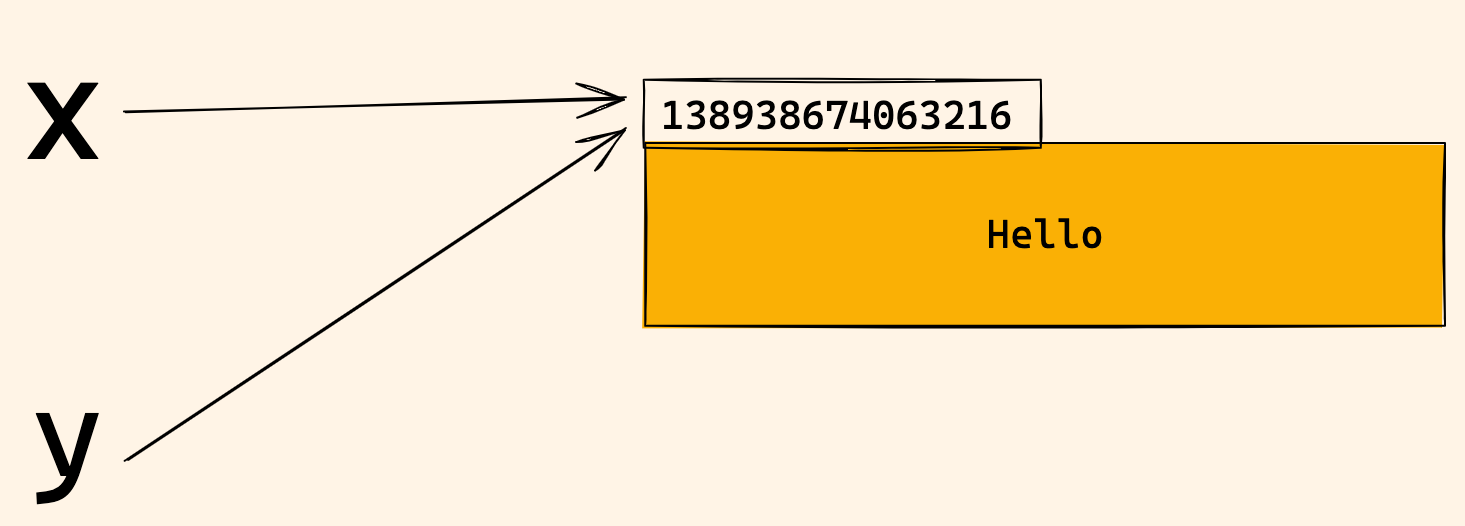



# Without interning

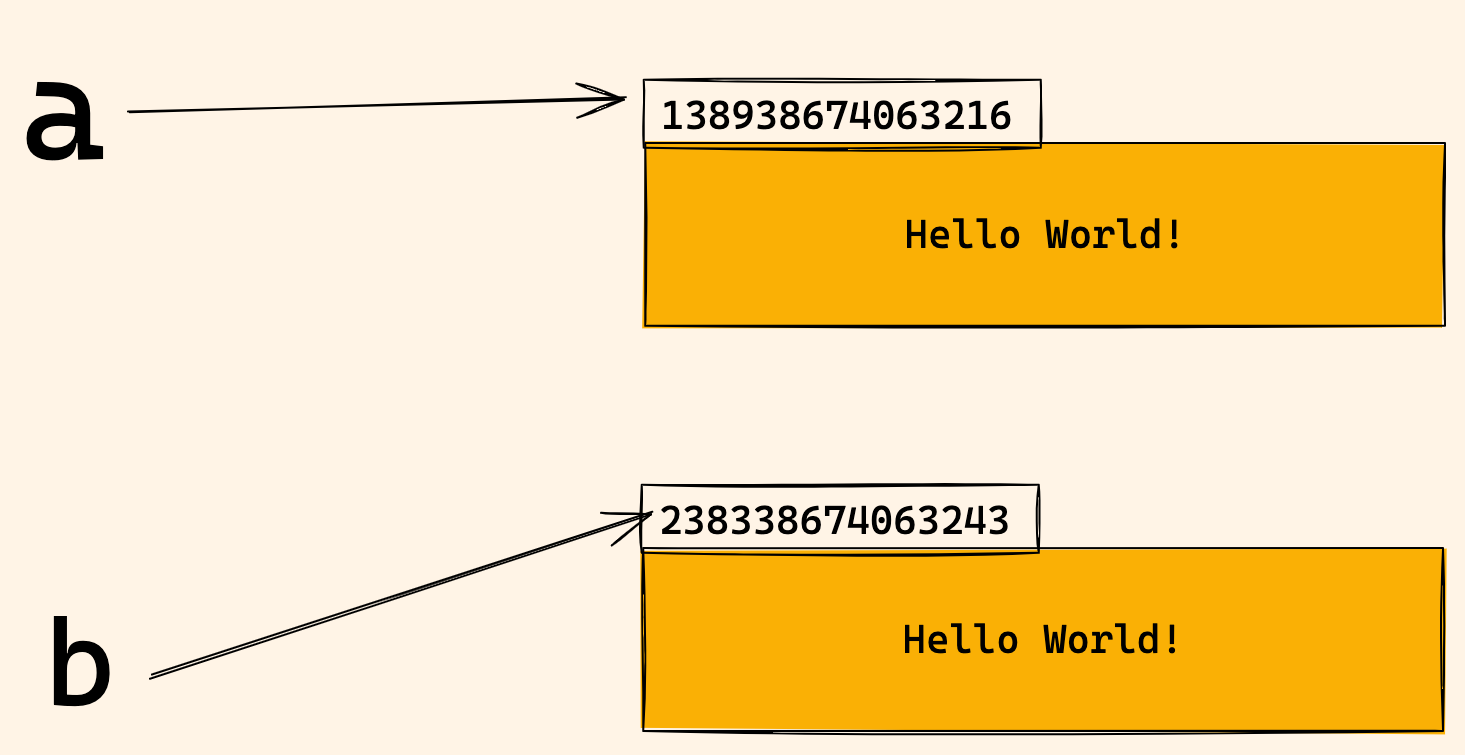


# Explicit Interning

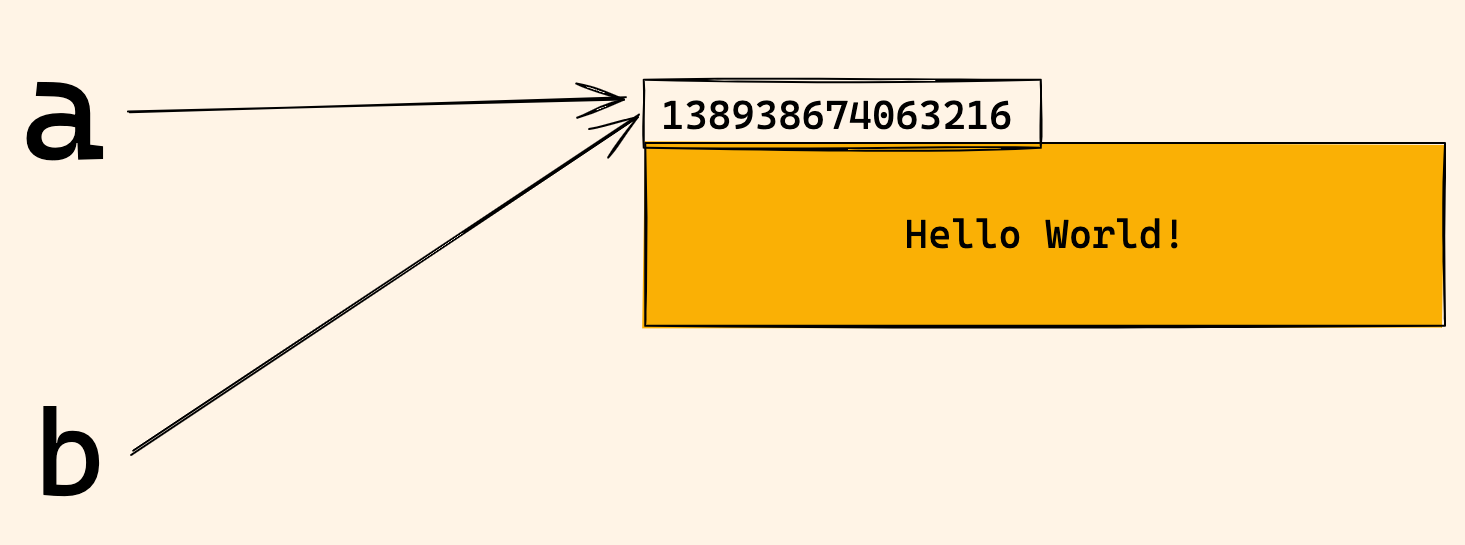


In [ ]:
# string immutability and identity comparison

x = "hello"
y = "hello"

print(x[0])
# string1[0] = 'H' # Output: TypeError: 'str' object does not support item assignment

print(x is y)  # Output: True (both point to the same object in memory)
print(id(x) == id(y)) # Output: True
print(id(x))
print(id(y))


# is (Identity Operator):
# Compares the memory addresses of two objects.
# Returns True if the objects are the same object in memory, otherwise False.
# id - returns the unique identifier of the odject


a = "hello!"
b = "hello!"
print(x is a) # Output: False (different string objects)
print(id(a))
print(id(b))

x += "!"  # This creates a NEW string object
print(x is a) # Output: False (different objects in memory)
print(x) # Output: hello!
print(x == a) # Output: True (same content)


h
True
True
138938674063216
138938674063216
False
138937775348656
138937775350896
False
hello!
True


# String Interning
- String interning is a memory optimization technique where only one instance of a string is stored in memory.
-  Subsequent occurrences of the same string literal refer to this single instance.

## Always Interned
- Empty strings: Strings of length 0 are always interned.
- Single-character strings: Strings of length 1 are always interned.
- Identifiers: Strings that meet the requirements of Python identifiers (letters, numbers, underscores) are often interned, even if they are longer.


## Sometimes Interned
-  Short strings: Python may intern short strings (typically less than 20 characters), depending on the implementation and runtime conditions.
-  Compile-time constants: Strings defined as constants at compile time are often interned.

## Not Interned:
### Long strings:
-  Strings exceeding a certain length (implementation-dependent) are usually not interned.
-  Up until version 3.7, Python used peephole optimization, and all strings longer than 20 characters were not interned. However, now it uses the AST optimizer, and (most) strings up to 4096 characters are interned.

### Dynamically created strings:
- Strings created at runtime through concatenation or other operations are not guaranteed to be interned.

# Integer Interning

In [ ]:
# Interning in Action: Integers

# Small integers (range -5 to 256) are also interned by default.

integer1 = 100
integer2 = 100
print(id(integer1))
print(id(integer2))
print(integer1 is integer2)  # Output: True (same memory address)

integer3 = 1000
integer4 = 1000
print(id(integer3))
print(id(integer4))
print(integer3 is integer4) # Output: True or False, depends on the implementation




4518369056
4518369056
True
140297692066256
140297692066352
False


# Explicit Interning

In [ ]:


# For other strings, use the sys.intern() function to force interning.

import sys

x = "Hello World!"
y = "Hello World!"

print(a is b)  # Output: False (different memory address)


a = sys.intern("Hello World!")
b = sys.intern("Hello World!")

print(a is b)  # Output: True (same memory address)
print(a is x)  # Output: False



False
True
False


# Optimising Dictionary Lookup

In [ ]:
import sys
import time

def time_dict_lookup(my_dict, key):
  start_time = time.time()
  value = my_dict[key]
  end_time = time.time()
  return end_time - start_time


num_of_items = 10000000
# Without interning
start_time = time.time()
non_interned_keys = [f"hello world {i}" for i in range(num_of_items)]
values = [i for i in range(num_of_items)]

non_interned_dict = dict(zip(non_interned_keys, values))
end_time = time.time()
print(f"Dictionary creation without interning: {end_time - start_time}")

# With interning
start_time = time.time()
interned_keys = [sys.intern(f"hello world {i}") for i in range(num_of_items)]

interned_dict = dict(zip(interned_keys, values))
end_time = time.time()
print(f"Dictionary creation with interning: {end_time - start_time}")


lookup_time = time_dict_lookup(non_interned_dict, "hello world 50000")

print(f"Lookup time without interning: {lookup_time}")

lookup_time = time_dict_lookup(interned_dict, "hello world 50000")

print(f"Lookup time with interning: {lookup_time}")



Dictionary creation without interning: 8.259199857711792
Dictionary creation with interning: 11.389118194580078
Lookup time without interning: 2.384185791015625e-06
Lookup time with interning: 1.430511474609375e-06




## When is Interning Useful?

- Interning is beneficial in scenarios where frequent string comparisons are needed, such as in compiler, parsers, or when keys in a hash table are strings.

- Speeds up string comparison, you only need to compare whether their memory addresses are the same, instead of comparing the contents(is(identity check))

- Faster dictionary lookups.

## When is Interning Not Useful?
- If you only have a few string occurrences or seldomly compare them, manual interning does not improve performance and may even increase memory use because of creating a new object.

- Potential for memory leak risk.

- Can be expensive in multi threaded environment.



# Summary

- Optimisation technique used to save memory, speed up string comparisons, dictionary lookups.
- Profiling needs to be done multiple on your Python runtime
- The difference in performance can be very small or negligible depending on several factors
- Trades off speed for memory
- `sys.intern` is adding overhead in object creation and maintain global interned data.

